<a href="https://colab.research.google.com/github/pmilks/cap-comp215/blob/main/STAT305_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#HURDAT Parsing -> Hurricane Objects w/ list of Entry objects
from dataclasses import dataclass
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

@dataclass
class Hurricane():
    name: str
    entries: list
    year: str
    basin: str
    atfc: int

    def __str__(self):
        return f'Storm {self.name} in {self.year} with {len(self.entries)} entries.'

    @classmethod
    def from_splt_hur(cls,splt_hur):
        splt_hur_head=[i.strip(' ') for i in splt_hur[0].split(',')]
        new = Hurricane(name=splt_hur_head[1],
                        year=splt_hur_head[0][-4:],
                        basin=splt_hur_head[0][:2],
                        atfc=splt_hur_head[0][-6:-4],
                        entries=[])
        new.entries=Entry.entries_factory(splt_hur[1:])
        return new

    def total_max_wind(self):
        max=0
        for entry in self.entries:
            if entry.max_wind > max:
                max = entry.max_wind
        return max


@dataclass
class Entry():
    date: datetime
    identifier: str
    status: str
    coordinates: tuple
    max_wind: int
    min_pressure: int
    radius: int

    def __str__(self):
        return f'{self.date} at {self.coordinates}\nID: {self.identifier}, Status: {self.status}\nMax Wind: {self.max_wind}, Min Pressure: {self.min_pressure}, Radius: {self.radius}'

    @classmethod
    def Factory(cls, entry):
        return Entry(date=datetime.strptime(f"{entry[0]}{entry[1]}",'%Y%m%d%H%M'),
                    identifier=entry[2],
                    status=entry[3],
                    coordinates=(entry[4], entry[5]),
                    max_wind=int(entry[6]),
                    min_pressure=int(entry[7]),
                    radius=int(entry[20]))

    @classmethod
    def entries_factory(cls,raw_entries):
        entries=[]
        for entry in raw_entries:
            entry_splt=[i.strip(' ') for i in entry.split(',')]
            entries.append(Entry.Factory(entry_splt))
        return entries

splt_hurricanes_raw=[]
with open("hurdat1923_2023.txt","r") as f:
    hur=[]
    for line in f:
        if line[0].isalpha():
            if hur != []:
                splt_hurricanes_raw.append(hur)
                hur=[]
        hur.append(line.strip())

hurricanes_classed=[]
for i in splt_hurricanes_raw:
    hurricanes_classed.append(Hurricane.from_splt_hur(i))
for i in hurricanes_classed[0:50]:
    print(i)

Storm UNNAMED in 1923 with 28 entries.
Storm UNNAMED in 1923 with 39 entries.
Storm UNNAMED in 1923 with 17 entries.
Storm UNNAMED in 1923 with 21 entries.
Storm UNNAMED in 1923 with 41 entries.
Storm UNNAMED in 1923 with 22 entries.
Storm UNNAMED in 1923 with 21 entries.
Storm UNNAMED in 1923 with 23 entries.
Storm UNNAMED in 1923 with 12 entries.
Storm UNNAMED in 1924 with 14 entries.
Storm UNNAMED in 1924 with 11 entries.
Storm UNNAMED in 1924 with 50 entries.
Storm UNNAMED in 1924 with 48 entries.
Storm UNNAMED in 1924 with 29 entries.
Storm UNNAMED in 1924 with 12 entries.
Storm UNNAMED in 1924 with 48 entries.
Storm UNNAMED in 1924 with 18 entries.
Storm UNNAMED in 1924 with 16 entries.
Storm UNNAMED in 1924 with 40 entries.
Storm UNNAMED in 1924 with 38 entries.
Storm UNNAMED in 1925 with 14 entries.
Storm UNNAMED in 1925 with 11 entries.
Storm UNNAMED in 1925 with 8 entries.
Storm UNNAMED in 1925 with 36 entries.
Storm UNNAMED in 1926 with 47 entries.
Storm UNNAMED in 1926 with

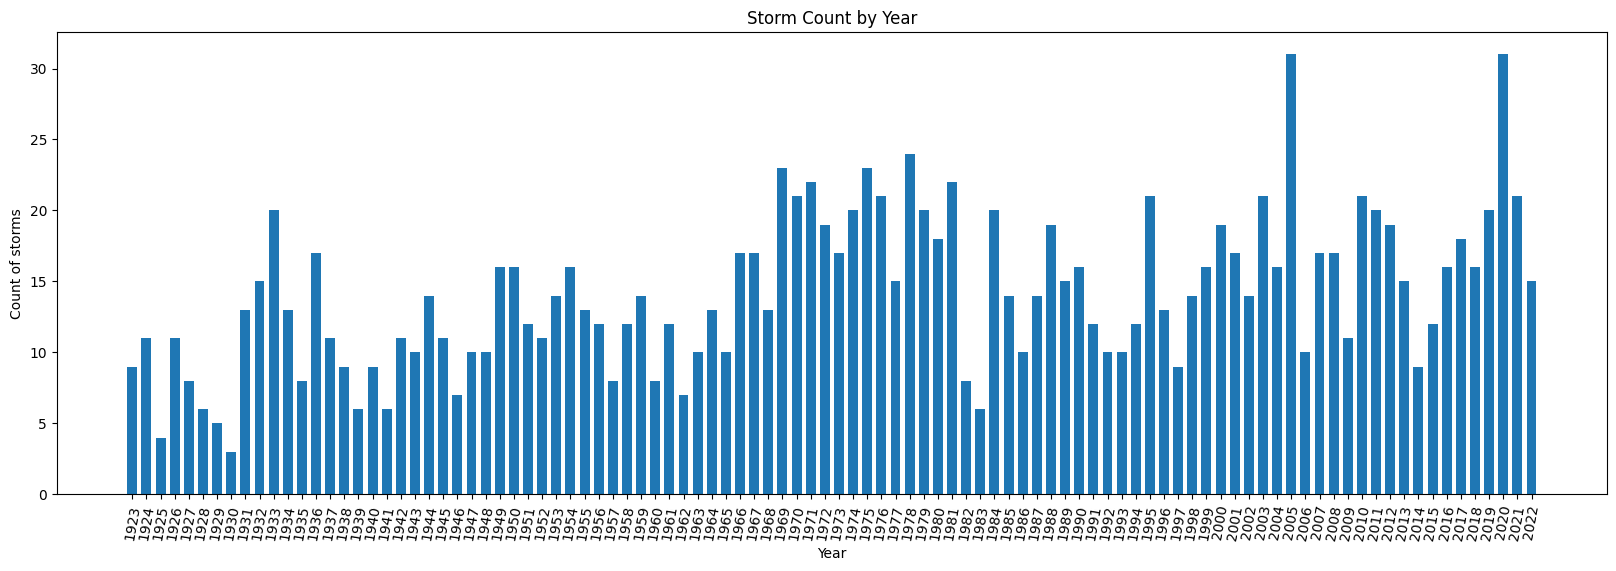

In [93]:
#Storms by year
storm_count={}
for i in hurricanes_classed:
    if i.year in storm_count.keys():
        storm_count[i.year]+=1
    else:
        storm_count[i.year]=1
plt.figure(figsize=(20,6))
plt.bar(storm_count.keys(), storm_count.values(), width=0.7)
plt.xticks(rotation=80)
plt.xlabel("Year")
plt.ylabel("Count of storms")
plt.title("Storm Count by Year")
plt.show()

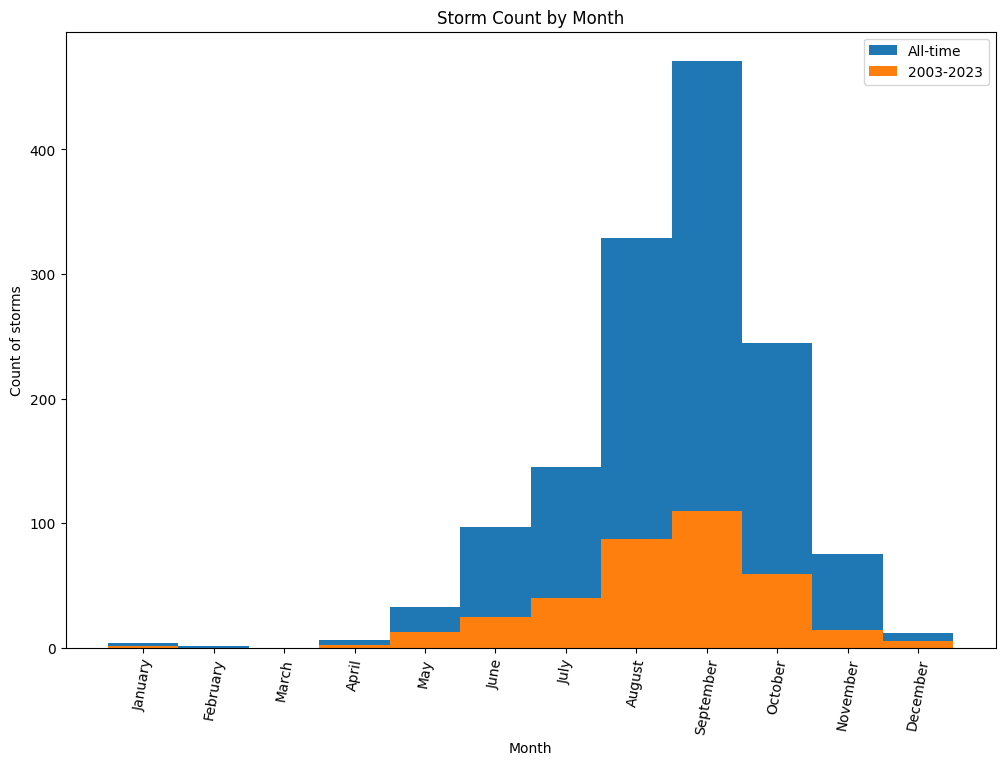

In [118]:
#Storm by birth month
month_count_all={}
for i in hurricanes_classed:
  if i.entries[0].date.month not in month_count_all.keys():
    month_count_all[i.entries[0].date.month]=1
  else:
    month_count_all[i.entries[0].date.month]+=1

month_count_short={}
for i in hurricanes_classed:
  if int(i.year) in range(2003,2023):
    if i.entries[0].date.month not in month_count_short.keys():
      month_count_short[i.entries[0].date.month]=1
    else:
      month_count_short[i.entries[0].date.month]+=1

plt.figure(figsize=(12,8))
plt.bar(month_count_all.keys(), month_count_all.values(), width=1,label='All-time')
plt.bar(month_count_short.keys(), month_count_short.values(),width=1,label='2003-2023')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=80)
plt.xlabel("Month")
plt.ylabel("Count of storms")
plt.title("Storm Count by Month")
plt.legend()
plt.show()

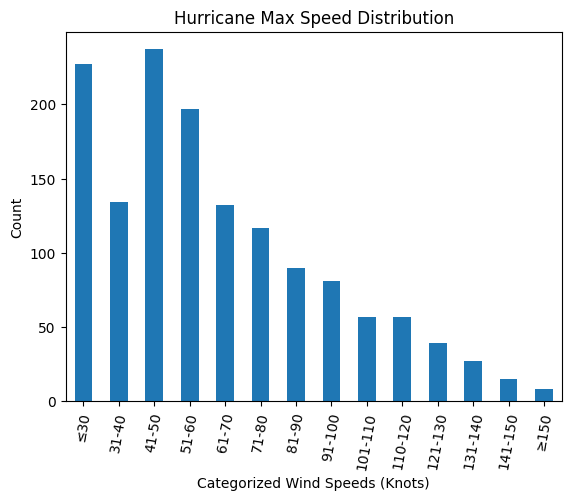

In [100]:
#Storms by Max Speed
max_speeds=[]
for i in hurricanes_classed:
  max_speeds.append(i.total_max_wind())
df=pd.DataFrame({'Speeds': max_speeds})
df['bins'] = pd.cut(df['Speeds'], bins=[0,30,40,50,60,70,80,90,100,110,120,130,140,150,999],
                    labels=['≤30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','110-120','121-130','131-140','141-150','≥150'])
ax=df['bins'].value_counts().sort_index().plot.bar(rot=80)
ax.set_title('Hurricane Max Speed Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Categorized Wind Speeds (Knots)')
plt.show()

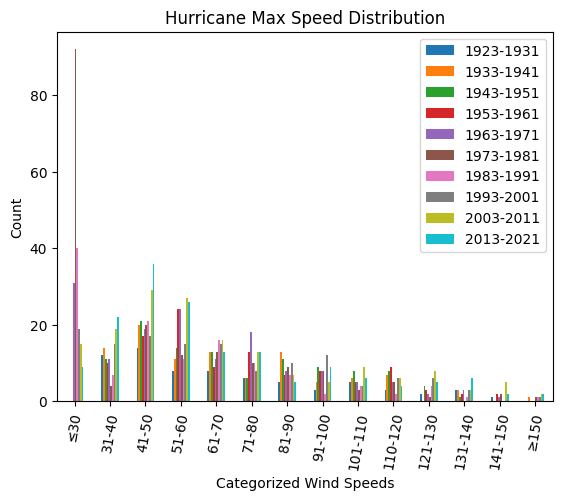

<Figure size 3000x600 with 0 Axes>

In [97]:
#Storms by max speed and era
yrs_speeds={}
for i in range(1923,2023,10):
  yrs_speeds[range(i,i+9)]=[]
for i in hurricanes_classed:
  for j in yrs_speeds.keys():
    if int(i.year) in j:
      yrs_speeds[j].append(i.total_max_wind())

df_bins=pd.DataFrame()
for i in yrs_speeds.keys():
  df_speed=pd.DataFrame({f'{i[0]}-{i[-1]}':yrs_speeds[i]})
  df_bins[f'{i[0]}-{i[-1]}']=pd.cut(yrs_speeds[i], bins=[0,30,40,50,60,70,80,90,100,110,120,130,140,150,999],
                    labels=['≤30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','110-120','121-130','131-140','141-150','≥150']).value_counts()
ax=pd.DataFrame(df_bins).plot(kind='bar',rot=80)
ax.set_title('Hurricane Max Speed Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Categorized Wind Speeds (Knots)')
plt.show()

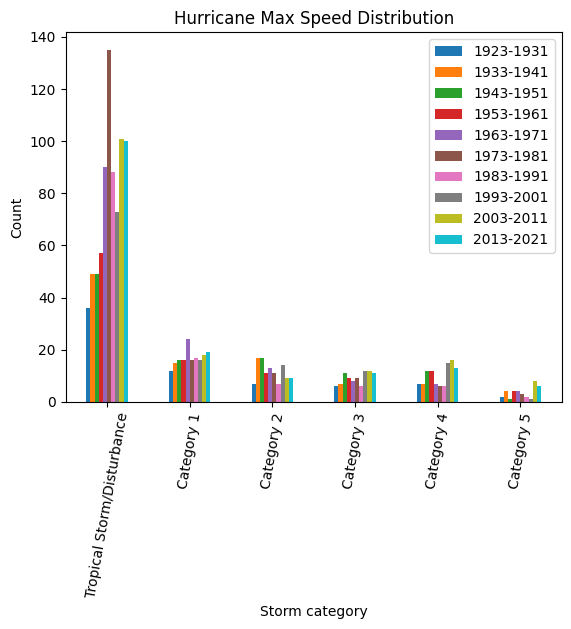

In [98]:
#Storms by category and era
yrs_speeds={}
for i in range(1923,2023,10):
  yrs_speeds[range(i,i+9)]=[]
for i in hurricanes_classed:
  for j in yrs_speeds.keys():
    if int(i.year) in j:
      yrs_speeds[j].append(i.total_max_wind())

df_bins=pd.DataFrame()
for i in yrs_speeds.keys():
  df_speed=pd.DataFrame({f'{i[0]}-{i[-1]}':yrs_speeds[i]})
  df_bins[f'{i[0]}-{i[-1]}']=pd.cut(yrs_speeds[i], bins=[0,65,83,96,113,135,999],
                    labels=['Tropical Storm/Disturbance','Category 1','Category 2','Category 3','Category 4','Category 5']).value_counts()
ax=pd.DataFrame(df_bins).plot(kind='bar',rot=80)
ax.set_title('Hurricane Max Speed Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Storm Category')
plt.show()